# Model

First, declare functions that will be used to analyse the variables and to create the model.

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
sb.set_theme()

data = pd.read_csv("../data/movies_with_vars.csv")

def generateClassificationTree(data, predictorName,responseName, depth, class_names):
    print(f'{predictorName} vs. {responseName} with depth {depth}')
    response = pd.DataFrame(data[responseName]) # Response
    predictor = pd.DataFrame(data[predictorName]) # Predictor

    # Using the sample() method to get a more random train and test set
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor,response, test_size = 0.25)

    # Create a joint dataframe by concatenating Predictor and Response
    trainDF = pd.concat([predictor_train, response_train], axis = 1).reindex(predictor_train.index)

    # Joint Boxplot of Predictor Train against Response Train
    plt.figure(figsize=(12, 4))
    sb.swarmplot(x = predictorName, y = responseName, data = trainDF, orient = "h")

    # Create a Decision Tree Classifier object
    dectree = DecisionTreeClassifier(max_depth = depth)

    # Train the Decision Tree Classifier model
    dectree.fit(predictor, response)

    plt.figure(figsize=(16,16))
    plot_tree(dectree, filled=True, rounded=True, 
          feature_names=[predictorName], 
          class_names=class_names)

    # Print the Classification Accuracy
    print("Train Classification Accuracy \t:", dectree.score(predictor_train, response_train))
    print("Test Classification Accuracy \t:", dectree.score(predictor_test, response_test))

    response_train_pred = dectree.predict(predictor_train)
    response_test_pred = dectree.predict(predictor_test)
    
    return response_train, response_train_pred, response_test, response_test_pred

def generateConfusionMatrix(response, response_pred, title):
    plt.figure(figsize=(6,6))
    plt.title(title)
    sb.heatmap(confusion_matrix(response, response_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
    # find false positive and false negative from confusion matrix
    true_negative, false_positive, false_negative, true_positive = confusion_matrix(response, response_pred).ravel()
    print(f'True Positive Rate: {true_positive/(true_positive+false_negative)}')
    print(f'False Positive Rate: {false_positive/(false_positive+true_negative)}')
    print(f'True Negative Rate: {true_negative/(true_negative+false_positive)}')
    print(f'False Negative Rate: {false_negative/(false_negative+true_positive)}')
    
def performLinearRegression (data, predictor, response):
    response = pd.DataFrame(data[response]) # Response
    predictor = pd.DataFrame(data[predictor]) # Predictor

    # Using the sample() method to get a more random train and test set
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor,response, test_size = 0.25)
    
    # Create a Linear Regression object
    linreg = LinearRegression()

    # Train the Linear Regression model
    linreg.fit(predictor_train, response_train)

    # Coefficients of the Linear Regression line
    b = linreg.intercept_
    a = linreg.coef_

    print('Intercept \t: b = ', b)
    print('Coefficients \t: a = ', a)
    print('R^2', linreg.score(predictor_train, response_train))

    # Plot the Linear Regression line
    f = plt.figure(figsize=(16, 8))
    plt.scatter(predictor_train, response_train)
    plt.plot(predictor_train, b + a * predictor_train, color = "red")
    plt.xlabel(predictor.columns[0])
    plt.ylabel(response.columns[0])
    plt.show()
    
    return linreg, predictor_train, predictor_test, response_train, response_test

# Linear Regression

Train Set : (5431, 1) (5431, 1)
Test Set  : (1811, 1) (1811, 1)
Intercept 	: b =  [6.5172534]
Coefficients 	: a =  [[0.17839067]]
R^2 0.002880800128261418


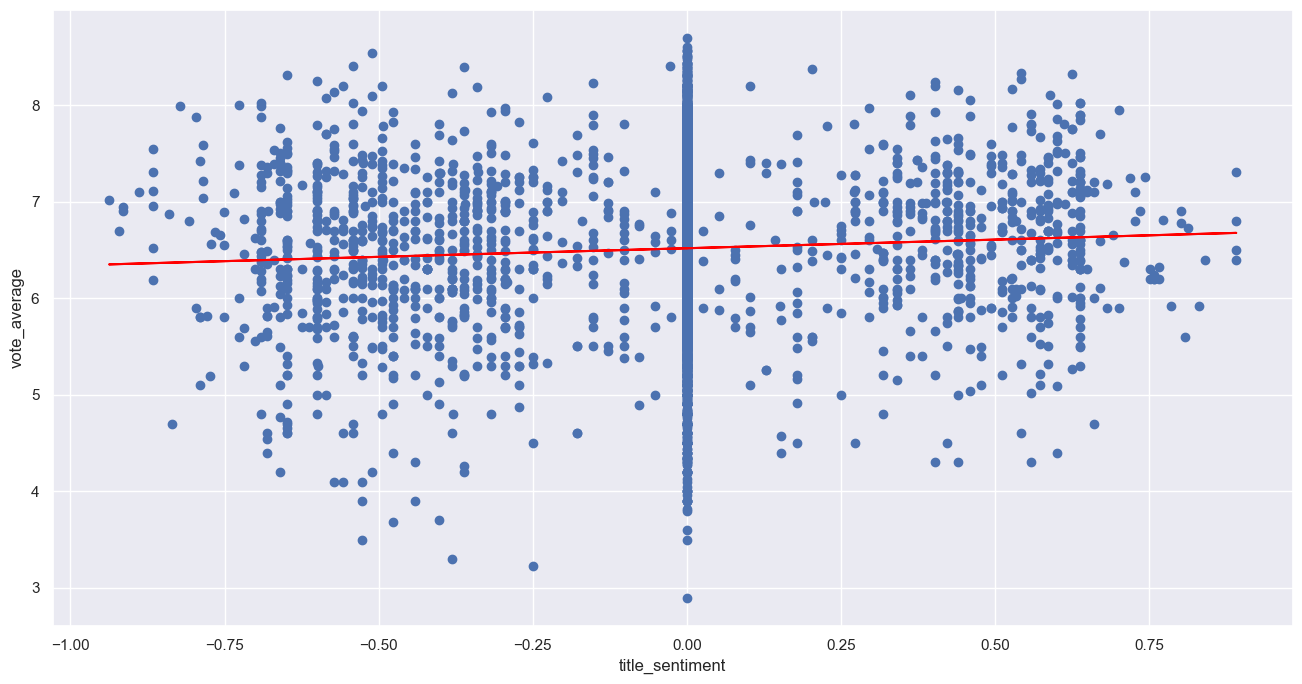

Train Set : (5431, 1) (5431, 1)
Test Set  : (1811, 1) (1811, 1)
Intercept 	: b =  [6.51929139]
Coefficients 	: a =  [[0.10822395]]
R^2 0.006999724262424567


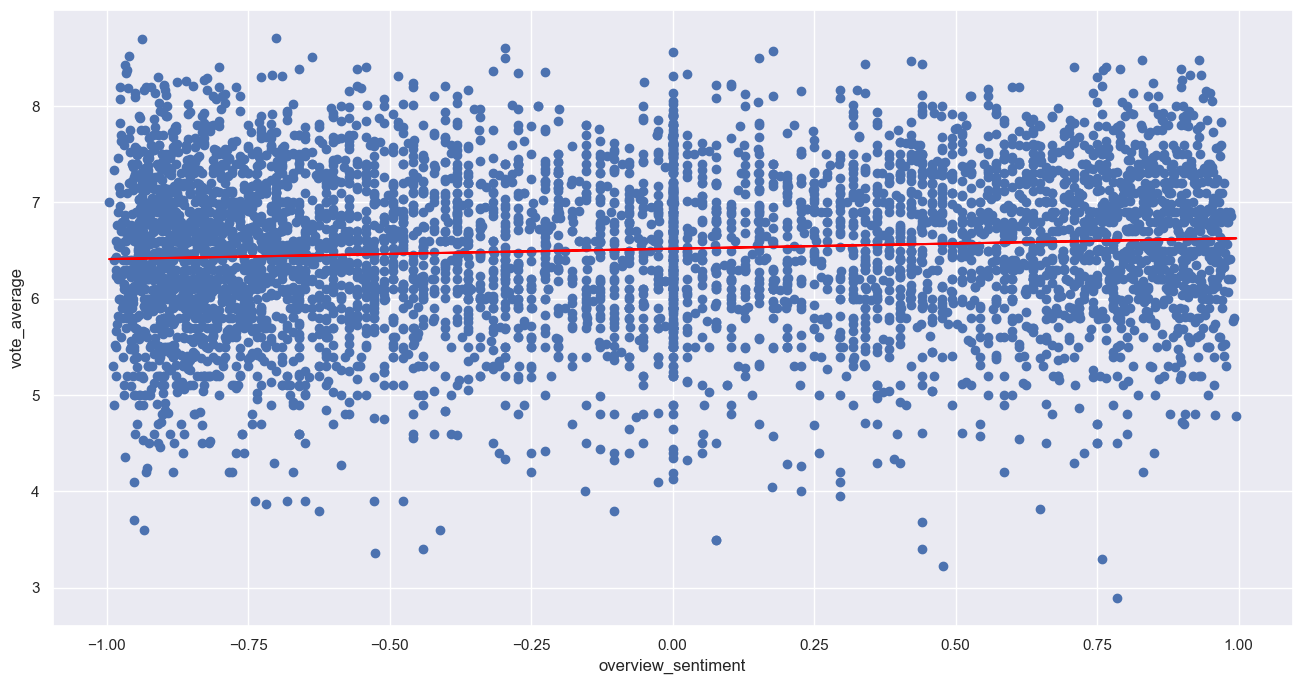

Train Set : (5431, 1) (5431, 1)
Test Set  : (1811, 1) (1811, 1)
Intercept 	: b =  [6.4210893]
Coefficients 	: a =  [[0.00499734]]
R^2 0.003703917860294337


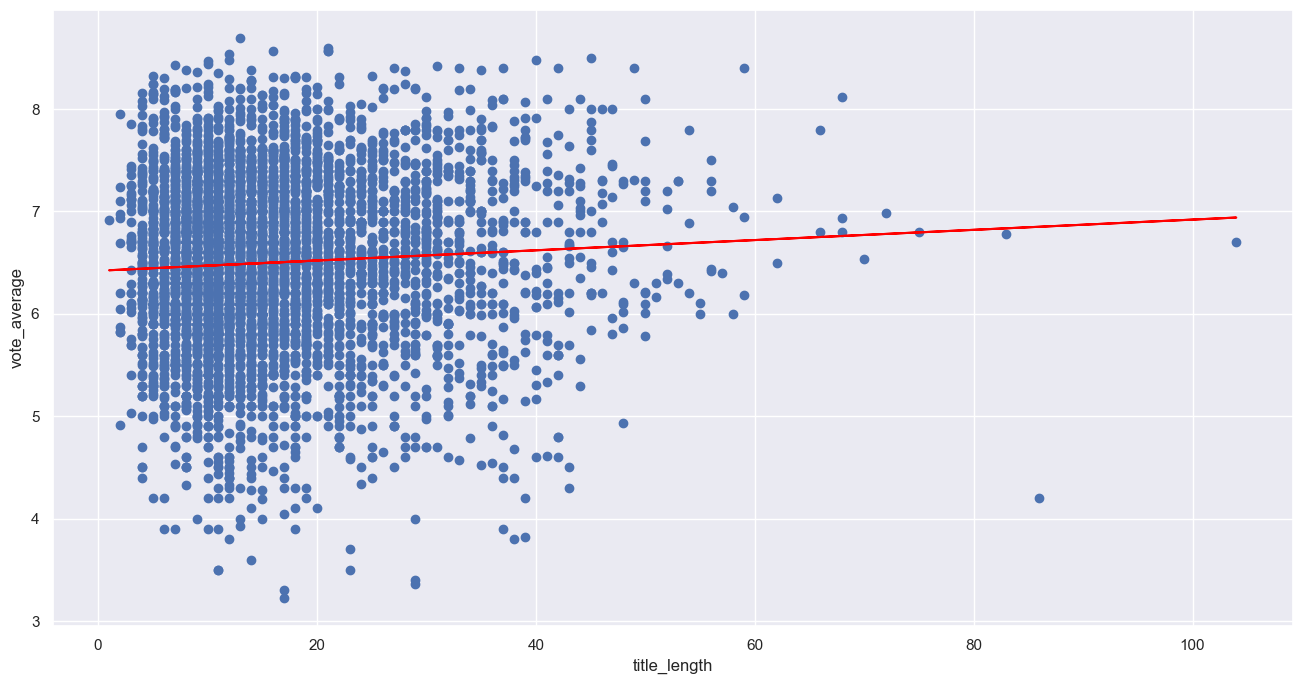

Train Set : (5431, 1) (5431, 1)
Test Set  : (1811, 1) (1811, 1)
Intercept 	: b =  [6.44488136]
Coefficients 	: a =  [[0.01783761]]
R^2 0.0015617338636391143


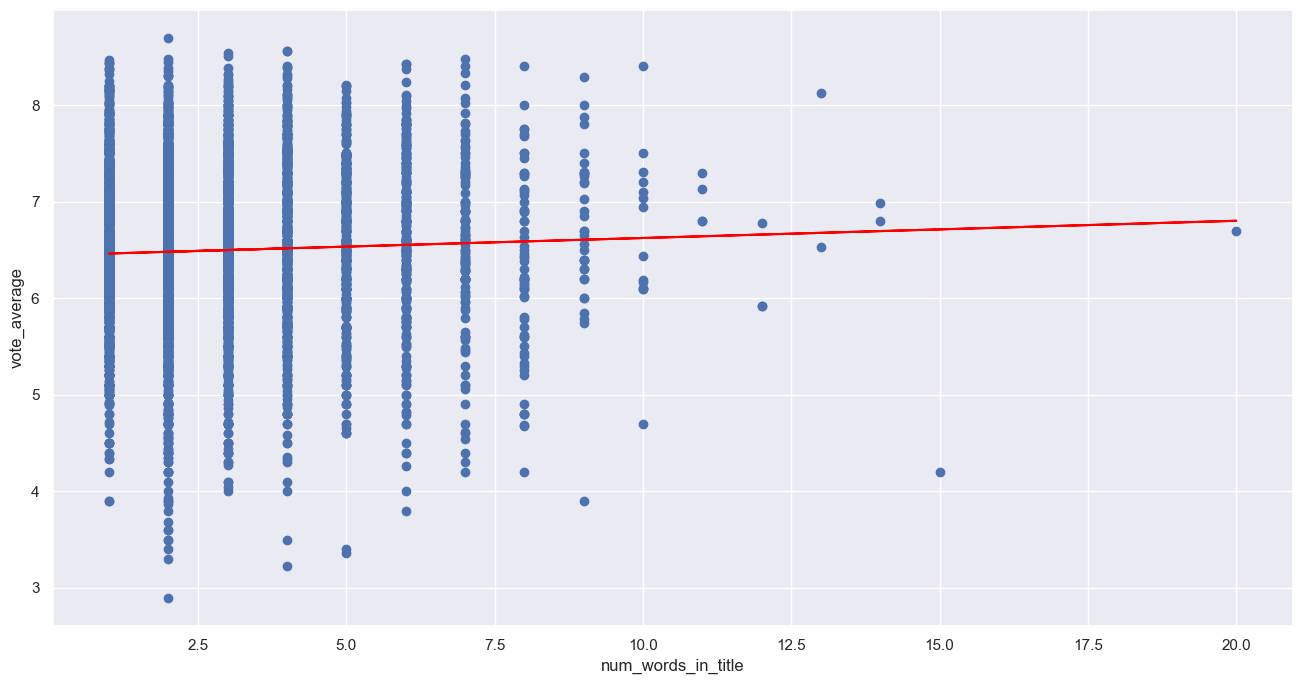

Train Set : (5431, 1) (5431, 1)
Test Set  : (1811, 1) (1811, 1)
Intercept 	: b =  [6.49428764]
Coefficients 	: a =  [[0.00202819]]
R^2 2.0996626395874962e-05


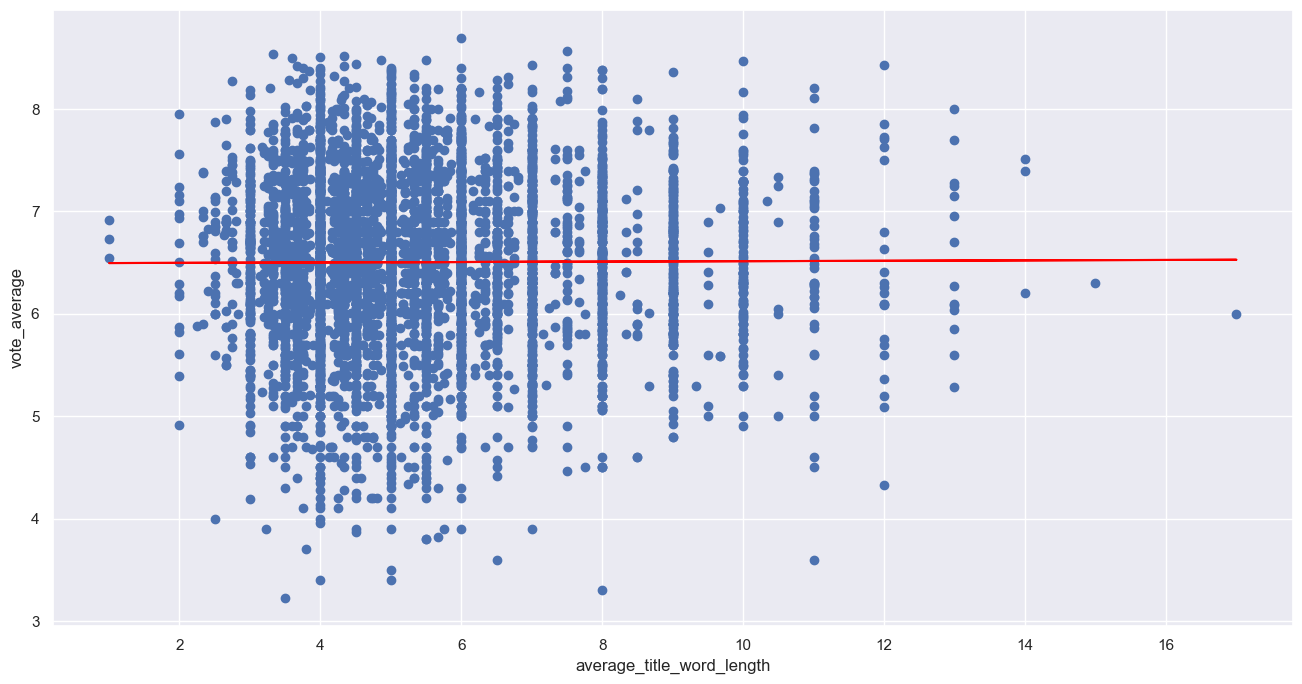

Train Set : (5431, 1) (5431, 1)
Test Set  : (1811, 1) (1811, 1)
Intercept 	: b =  [6.49555245]
Coefficients 	: a =  [[0.06899248]]
R^2 0.0012694017896895948


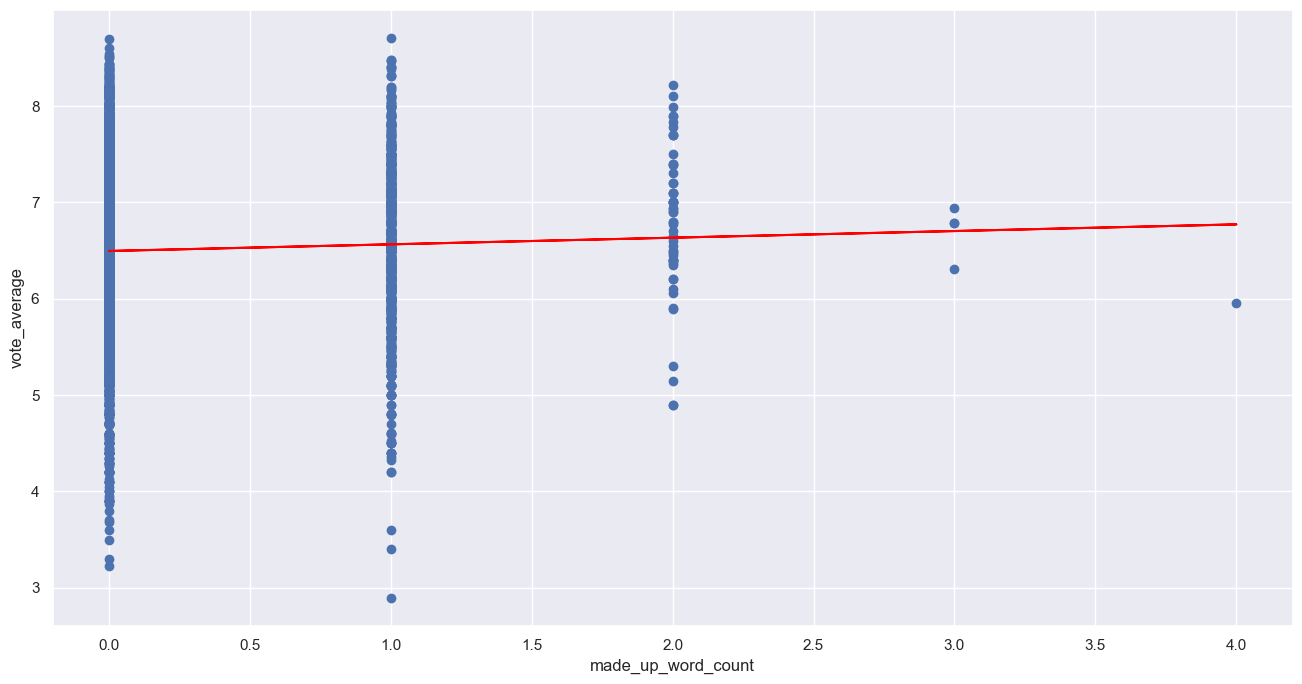

Train Set : (5431, 1) (5431, 1)
Test Set  : (1811, 1) (1811, 1)
Intercept 	: b =  [6.44665116]
Coefficients 	: a =  [[0.00170764]]
R^2 0.015628540813335645


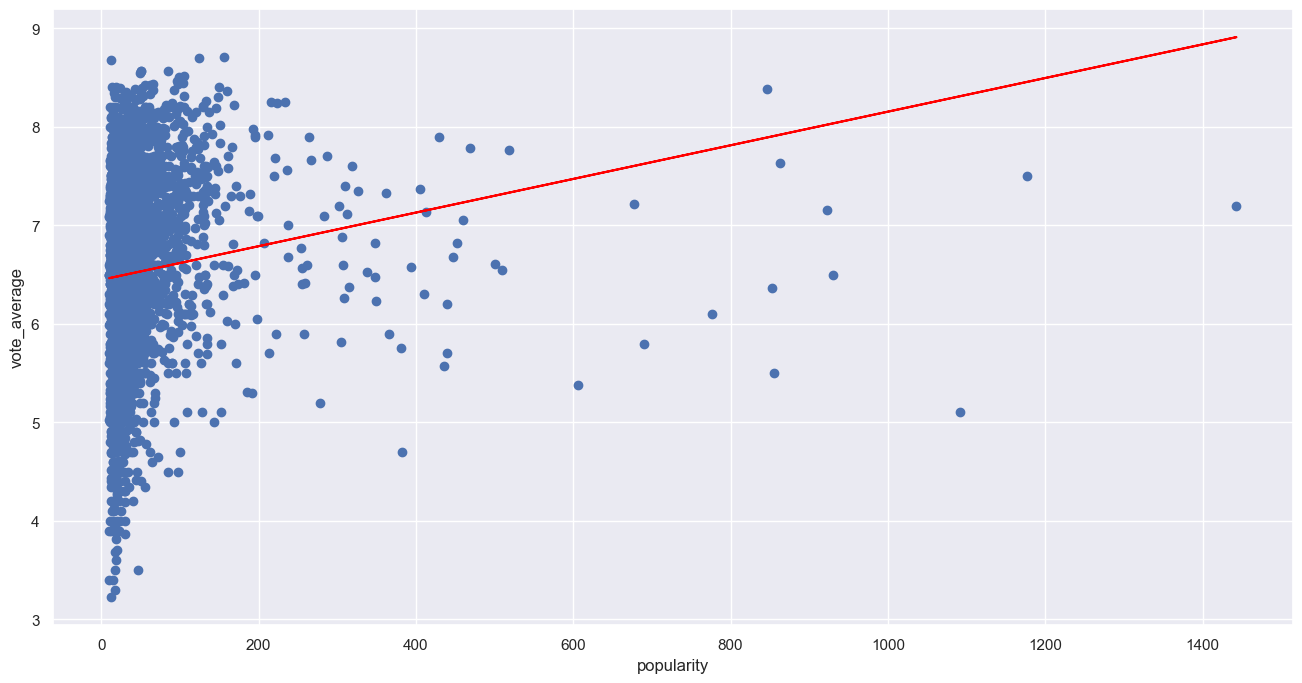

Train Set : (5431, 1) (5431, 1)
Test Set  : (1811, 1) (1811, 1)
Intercept 	: b =  [6.32516455]
Coefficients 	: a =  [[8.55371171e-05]]
R^2 0.1334329958548831


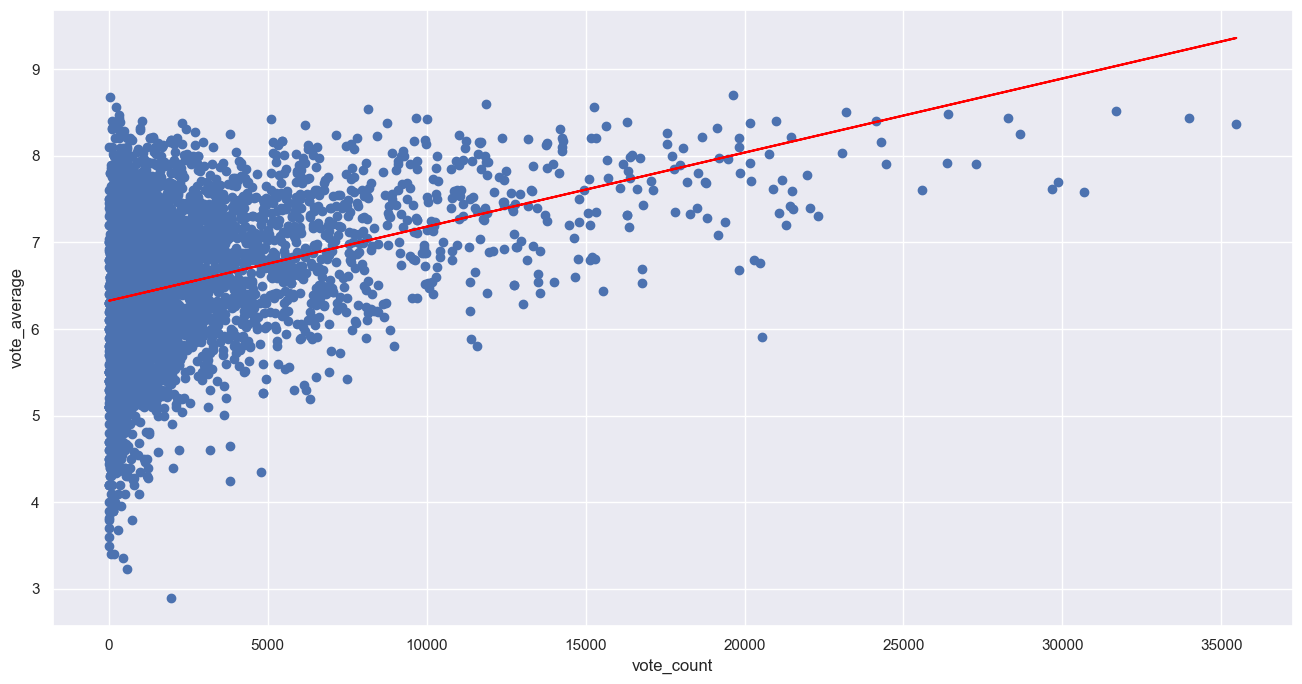

In [24]:
title_sentiment_linreg = performLinearRegression(data, 'title_sentiment', 'vote_average')
overview_sentiment_linreg = performLinearRegression(data, 'overview_sentiment', 'vote_average')
title_length_linreg = performLinearRegression(data, 'title_length', 'vote_average')
num_words_in_title_linreg = performLinearRegression(data, 'num_words_in_title', 'vote_average')
average_title_word_length_linreg = performLinearRegression(data, 'average_title_word_length', 'vote_average')
made_up_word_count_linreg = performLinearRegression(data, 'made_up_word_count', 'vote_average')
popularity_linreg = performLinearRegression(data, 'popularity', 'vote_average')
vote_count_linreg = performLinearRegression(data, 'vote_count', 'vote_average')


# Classification Tree

vote_average vs. has_made_up_word with depth 3


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 54.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Train Classification Accuracy 	: 0.8333640213588658
Test Classification Accuracy 	: 0.8404196576477084
True Positive Rate: 0.004410143329658214
False Positive Rate: 0.0004420866489832007
True Negative Rate: 0.9995579133510168
False Negative Rate: 0.9955898566703418
True Positive Rate: 0.0034482758620689655
False Positive Rate: 0.0
True Negative Rate: 1.0
False Negative Rate: 0.996551724137931


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


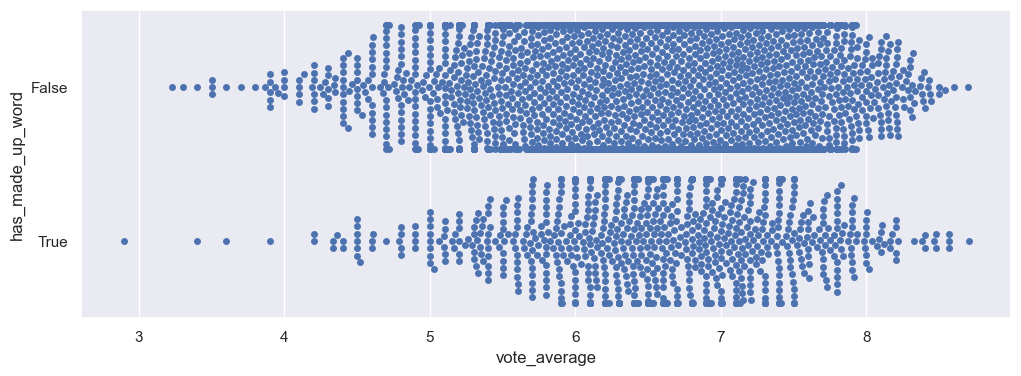

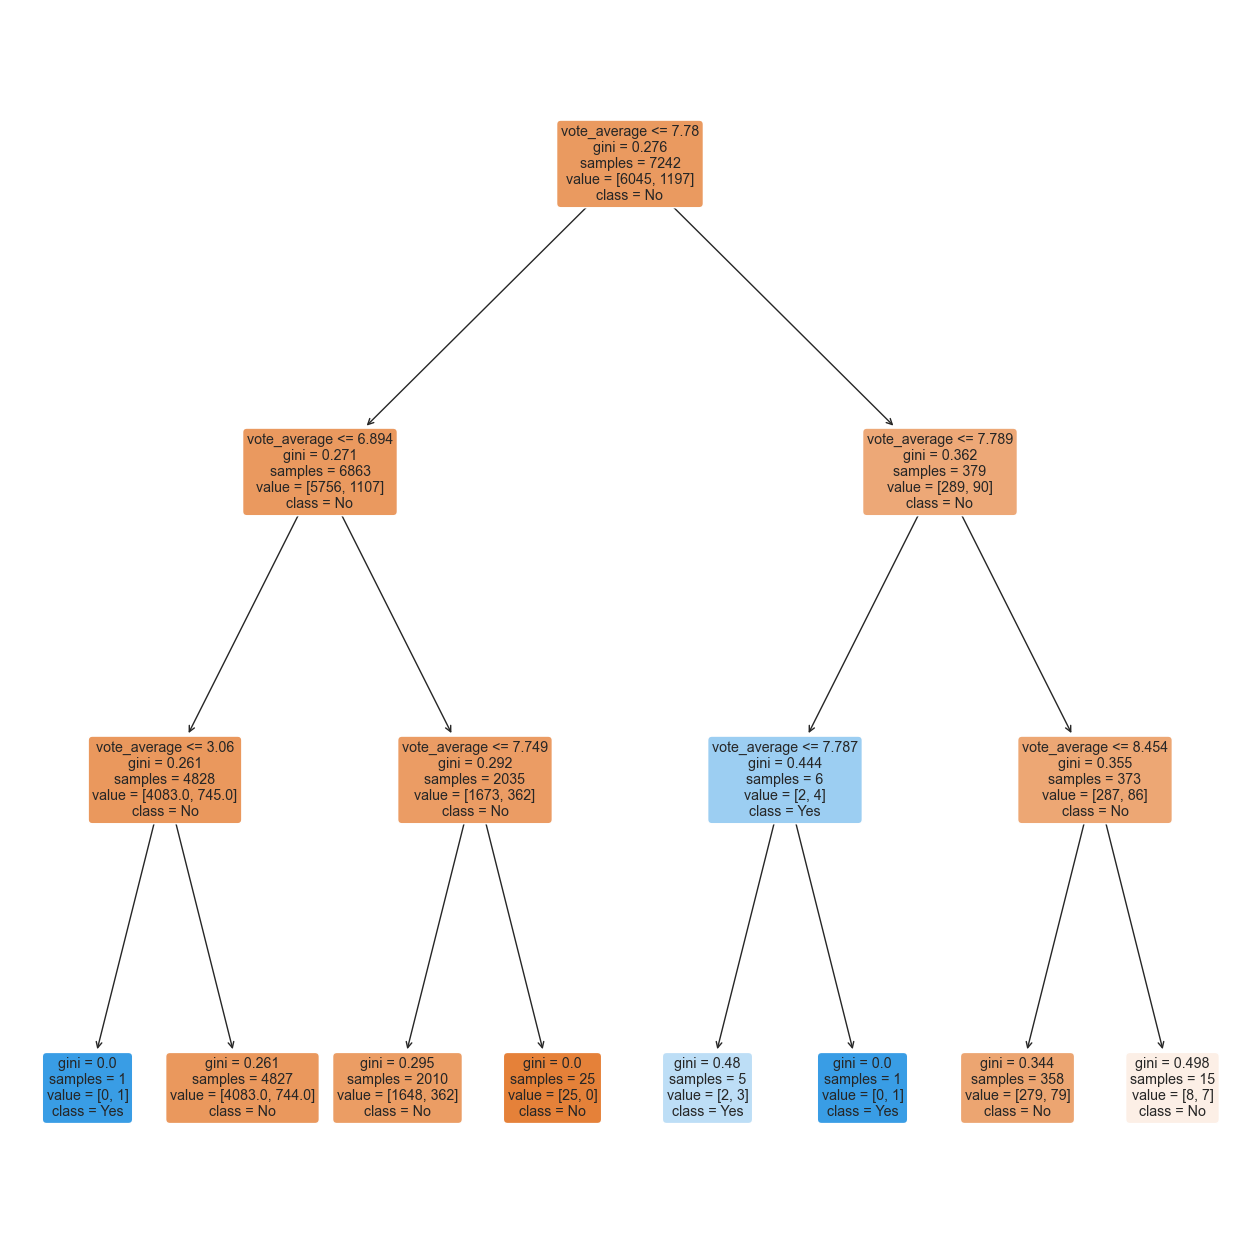

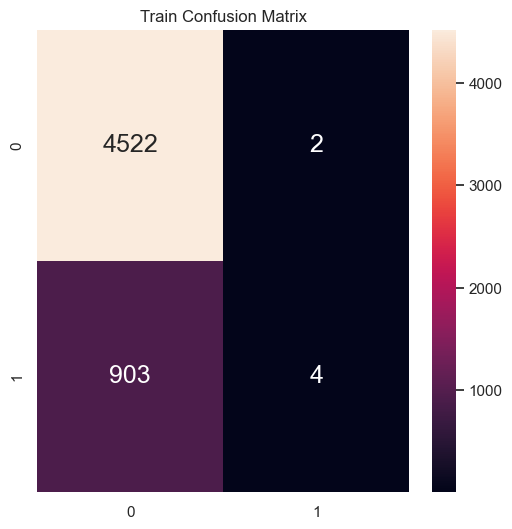

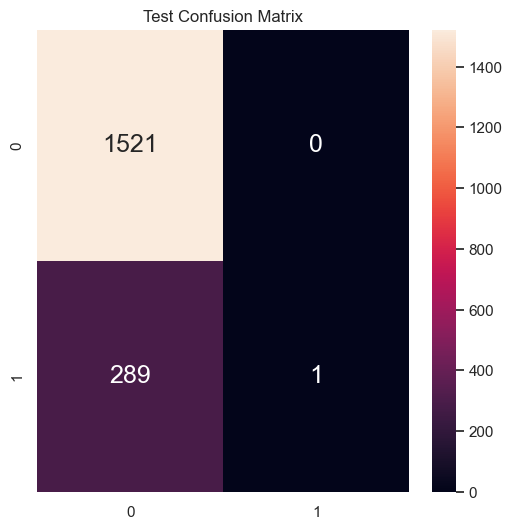

In [25]:
response_train_depth_4, response_train_pred_depth_4, response_test_depth_4, response_test_pred_depth_4 = generateClassificationTree(data,"vote_average",  "has_made_up_word",3 , ["No", "Yes"])
generateConfusionMatrix(response_train_depth_4, response_train_pred_depth_4, "Train Confusion Matrix")
generateConfusionMatrix(response_test_depth_4, response_test_pred_depth_4, "Test Confusion Matrix")